# Training Model with 70/30 split

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")


# Load the dataset
data = pd.read_csv('../data/processed/abalone.csv')

## Handling Sex variable

In [2]:
# Filter out only Male and Female samples
data_binary = data[data['Sex'].isin(['M', 'F'])].copy()

# Encode: Female = 0, Male = 1
data_binary['Gender'] = data_binary['Sex'].map({'F': 0, 'M': 1})

# Check distribution
data_binary['Gender'].value_counts(normalize=True)


Gender
1    0.539005
0    0.460995
Name: proportion, dtype: float64

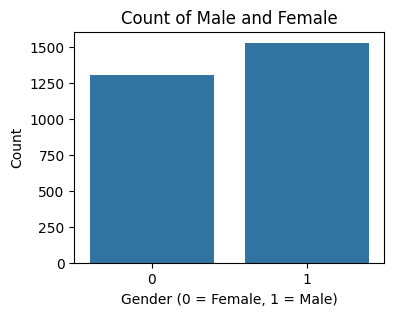

In [3]:
# Plot the count of male and female
plt.figure(figsize=(4, 3))
sns.countplot(x='Gender', data=data_binary)
plt.title('Count of Male and Female')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()


#### **Comment**

Proportions seems to be relatively close to 50-50 for both the genders, therefore methods such as oversampling is not required in this case.

In [ ]:
from sklearn.model_selection import train_test_split

# Drop categorical and target columns not used in predictors
X = data_binary.drop(columns=['Sex', 'Gender', 'Rings'])  # use only continuous predictors
y = data_binary['Gender']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


train_data = X_train.copy()
train_data['Gender'] = y_train

# Fit the logistic regression model (binomial family)
logit_model = smf.glm(
    formula='Gender ~ Length + Diameter + Height + Q("Whole weight") + Q("Shucked weight") + Q("Viscera weight") + Q("Shell weight")',
    data=train_data,
    family=sm.families.Binomial()
).fit()

logit_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Gender   No. Observations:                 1983
Model:                            GLM   Df Residuals:                     1975
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1338.0
Date:                Sat, 12 Apr 2025   Deviance:                       2676.1
Time:                        16:04:24   Pearson chi2:                 1.98e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03342
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.4614      0.556      6.223      0.000       2.371       4.552
Length                 -2.2739      2.434     -0.934      0.350      -7.044       2.496
Diameter               -5.9516      2.876     -2.069      0.039     -11.589      -0.314
Height                 -4.3147      2.863     -1.507      0.132      -9.926       1.296
Q("Whole weight")       0.0521      0.863      0.060      0.952      -1.639       1.743
Q("Shucked weight")     3.0240      0.995      3.039      0.002       1.073       4.975
Q("Viscera weight")    -0.8637      1.489     -0.580      0.562      -3.782       2.055
Q("Shell weight")       0.2979      1.353      0.220      0.826      -2.354       2.950
=======================================================================================
"""

## 2a. Comment

- **Filtered** to include only Male and Female samples, as original data contained Infants
- **Encoded** Gender: Female = 0, Male = 1
- **Dropped** 'Sex' and 'Rings' to keep only continuous predictors.
- **Checked balance**: There were ~54% Male vs ~46% Female, therefore fair proportions, hence no oversampling needed.
- **Split** data, 70% train and 30% test
- Finally, **Trained** the model using Logistic Model, using the Binomial Family


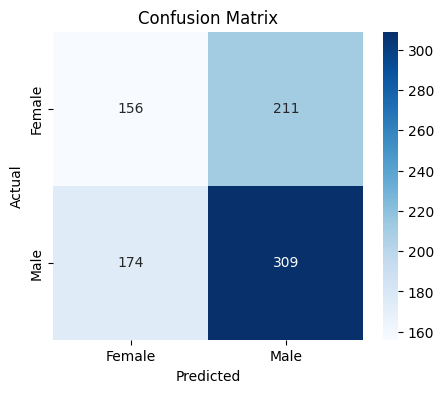

In [6]:

from sklearn.metrics import classification_report, confusion_matrix
predictions = logit_model.predict(X_test)

# Convert probabilities to binary predictions (0 or 1)
predictions_nomial = [0 if x < 0.5 else 1 for x in predictions]

cm = confusion_matrix(y_test, predictions_nomial)

# Plotting the confusion matrix

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [7]:
# Classification report
print(classification_report(y_test, predictions_nomial, digits = 3))

              precision    recall  f1-score   support

           0      0.473     0.425     0.448       367
           1      0.594     0.640     0.616       483

    accuracy                          0.547       850
   macro avg      0.533     0.532     0.532       850
weighted avg      0.542     0.547     0.543       850



In [8]:
# Accuracy, Sensitivity, Specificity
accuracy_percentage = (round(np.sum(np.diagonal(cm)) / np.sum(cm), 3))*100
sensitivity_percentage = (round(cm[1, 1] / np.sum(cm[1, :]), 3))*100
specificity_percentage = (round(cm[0, 0] / np.sum(cm[0, :]), 3))*100

print(f'Accuracy: {accuracy_percentage}%')
print(f'Sensitivity: {sensitivity_percentage}%')
print(f'Specificity: {specificity_percentage}%')

Accuracy: 54.7%
Sensitivity: 64.0%
Specificity: 42.5%


## 2b. Comments
- **Accuracy** being 54.7% means that the model was correctly able to predict gender for almost 55% of the abalones
- **Sensitivity** being 64% means that model was correctly able to predict 64% of the Male abalones
- **Specificity** being 42.5% means that model was correctly able to predict 42.5% of the Female abalones

**Interpretation**
- The model performed better at predicting Male abalones, than Female abalones, however the overall accuracy is quite low